fuente replica: https://www.mdpi.com/2071-1050/14/7/3977

**Datos:**
* household debt: https://www.imf.org/external/datamapper/HH_LS@GDD/CAN/GBR/USA/DEU/ITA/FRA/JPN/VNM
* economic growth: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG
* inflation: https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG
* expenditure to gdp: https://www.imf.org/external/datamapper/exp@FPP/USA/FRA/JPN/GBR/SWE/ESP/ITA/ZAF/IND
* house price index: https://www.banrep.gov.co/en/home-price-index-hpi
* interest rate: https://data.worldbank.org/indicator/FR.INR.RINR
* banrep rate: https://www.banrep.gov.co/es/estadisticas/tasas-interes-politica-monetaria
* unemployment: https://data.worldbank.org/indicator/SL.UEM.TOTL.NE.ZS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
df = pd.read_excel('silver_colombia.xlsx')
df.head()

,year,debt,gdp_growth,gov_exp,interest_rate,inflation,house_price,unemployment
0,1996,0.164994,0.020559,0.15700,0.209582,0.207976,356.193509,0.1181
1,1997,0.153769,0.034303,0.16300,0.144389,0.184700,395.009767,0.1214
2,1998,0.151111,0.005698,0.17000,0.233781,0.186770,437.285522,0.1500
3,1999,0.135627,-0.042040,0.19300,0.149196,0.108737,432.748329,0.2006
4,2000,0.097182,0.029249,0.26579,-0.111380,0.092253,436.153652,0.2052


In [7]:
df['log_house_price'] = np.log(df['house_price'])

<Axes: >

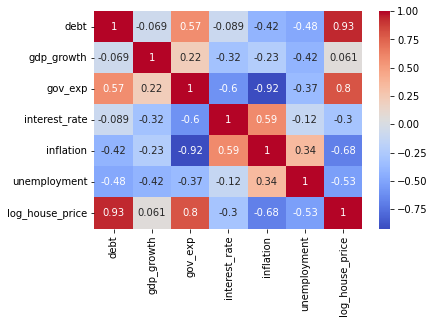

In [10]:
df_corr = df.drop(columns = ['house_price', 'year']).corr()
sns.heatmap(df_corr, annot = True, cmap='coolwarm')

In [11]:
df.columns

Index(['year', 'debt', 'gdp_growth', 'gov_exp', 'interest_rate', 'inflation',
       'house_price', 'unemployment', 'log_house_price'],
      dtype='object')

In [13]:
X = df[[ 'gdp_growth', 'gov_exp', 'interest_rate', 'inflation', 'unemployment', 'log_house_price']]
y = df['debt']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   debt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           6.28e-14
Time:                        13:22:35   Log-Likelihood:                 79.575
No. Observations:                  26   AIC:                            -145.1
Df Residuals:                      19   BIC:                            -136.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7766      0.067    -11.549      0.000      -0.917      -0.636
gdp_growth         -0.0123      0.107     -0.115      0.910      -0.236       0.211
gov_exp            -0.3075      0.178     -1.723      0.101      -0.681       0.066
interest_rate       0.0514      0.072      0.719      0.481      -0.098       0.201
inflation           0.3107      0.138      2.247      0.037       0.021       0.600
unemployment        0.1567      0.139      1.126      0.274      -0.135       0.448
log_house_price     0.1487      0.009     16.550      0.000       0.130       0.167
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.040
Skew:                           0.004   Prob(JB):                        0.980
Kurtosis:                       2.809   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""